In [2]:
import os
import sys
ROOT_DIR = os.environ['ROOT_DIR']
sys.path.append(ROOT_DIR)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## compile data 

In [3]:
model_path = os.path.join(ROOT_DIR, 'data', 'MADDPG', 'exp_003', 'results')
results_list = os.listdir(model_path)


['episode_scores.npy']


In [7]:
model_path = os.path.join(ROOT_DIR, 'data', 'MADDPG')
exp_ids = os.listdir(model_path)


['exp_003', 'exp_001', 'exp_002', 'exp_000']


In [19]:
def rolling_mean(series, window=100):
    ret_ls = []
    for idx, value in enumerate(series):
        ret_ls.append( np.mean(series[:idx]) if idx < 100 else np.mean(series[idx-100:idx]))
    return np.array(ret_ls)

columns=['model_name', 'exp_id', 'episode_id', 'agent_0_score', 'agent_1_score', 'max_agent_score', 'rolling_agent_score']
df = pd.DataFrame([], columns=columns)
for exp_id in exp_ids:
    exp_path = os.path.join(model_path, exp_id)
    results_fname = os.path.join(os.path.join(exp_path, 'results', 'episode_scores.npy'))
    arr = np.load(results_fname)
    tmp_df = pd.DataFrame([], columns=columns)
    tmp_df['episode_id'] = range(arr.shape[0])
    tmp_df['model_name'] = 'MADDPG'
    tmp_df['exp_id'] = exp_id
    tmp_df['agent_0_score'] = arr[:, 0]
    tmp_df['agent_1_score'] = arr[:, 1]
    tmp_df['max_agent_score'] = np.max(arr, axis=1)
    tmp_df['rolling_agent_score'] = rolling_mean(tmp_df['max_agent_score'])
    df = df.append(tmp_df)
    

In [20]:
df.shape

(6000, 7)

## Make Plot

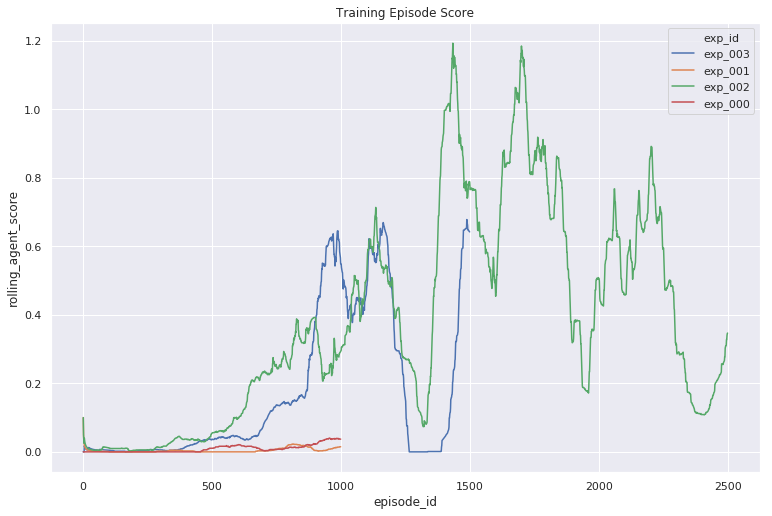

In [21]:


sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.lineplot(x="episode_id",
             y="rolling_agent_score",
             hue='exp_id',
             data=df)
plt.title('Training Episode Score')
plt.show()

In [ ]:
940